# Run Processor (notebook version)

This notebook reproduces the behavior of `run_processor_v2.py`: it sets up the project path, loads the preprocessing configuration, instantiates `DataPreprocessor`, and runs the processing pipeline. Run the cells in order.

In [ ]:
# Imports and project root setup
import sys
import yaml
from pathlib import Path
import matplotlib.pyplot as plt

# Configure matplotlib for non-transparent saved figures
plt.rcParams.update({
    'savefig.facecolor': 'white',
    'savefig.transparent': False,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'text.color': 'black',
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1
})

# Determine project root: prefer __file__ when available (script), otherwise search upward for 'config/preprocessing.yaml'
def find_project_root(start_path: Path = Path.cwd()):
    p = start_path.resolve()
    for parent in [p] + list(p.parents):
        if (parent / 'config' / 'preprocessing.yaml').exists():
            return parent
    return start_path.resolve()

try:
    project_root = Path(__file__).resolve().parent.parent
except NameError:
    project_root = find_project_root()

if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# (Optional) configure matplotlib interactive backend, if you want interactive selectors in this notebook
# Uncomment one of the following depending on your environment:
# %matplotlib widget
# %matplotlib notebook
%matplotlib inline

# Import the DataPreprocessor class from the package
from processing.data_preprocessor_v2 import DataPreprocessor

In [ ]:
# Load configuration and create the DataPreprocessor instance
config_path = project_root / 'config' / 'preprocessing.yaml'
with open(config_path) as f:
    config = yaml.safe_load(f)

dp = DataPreprocessor(config)


Using Linux data directory: /data/grki4829/CoBaLT
Measurement time: 2025-09-13 22:16:13

Preprocessed data file(s) found. No need to create new one(s)...
Locating and loading relevant netcdf data chunks...
Skipping chunk #0: 0.00–52.29s not in range 100.00–150.10s



Including chunk #1: 52.29–111.87s overlaps 100.00–150.10s
File loaded.

Including chunk #2: 111.87–171.03s overlaps 100.00–150.10s
File loaded.

✅ Full time range 100.00–150.10s covered by loaded chunks.
Loaded 2 files
Using resolutions: 1.000e+00 m x 5.000e+01 s.
Actual range and time bin sizes: 1.000e+00 m x 5.000e+01 s

Starting to generate histogram...
Finished generating histogram.
Time elapsed: 1.0 s
Elapsed time: 0.0002262592315673828 s


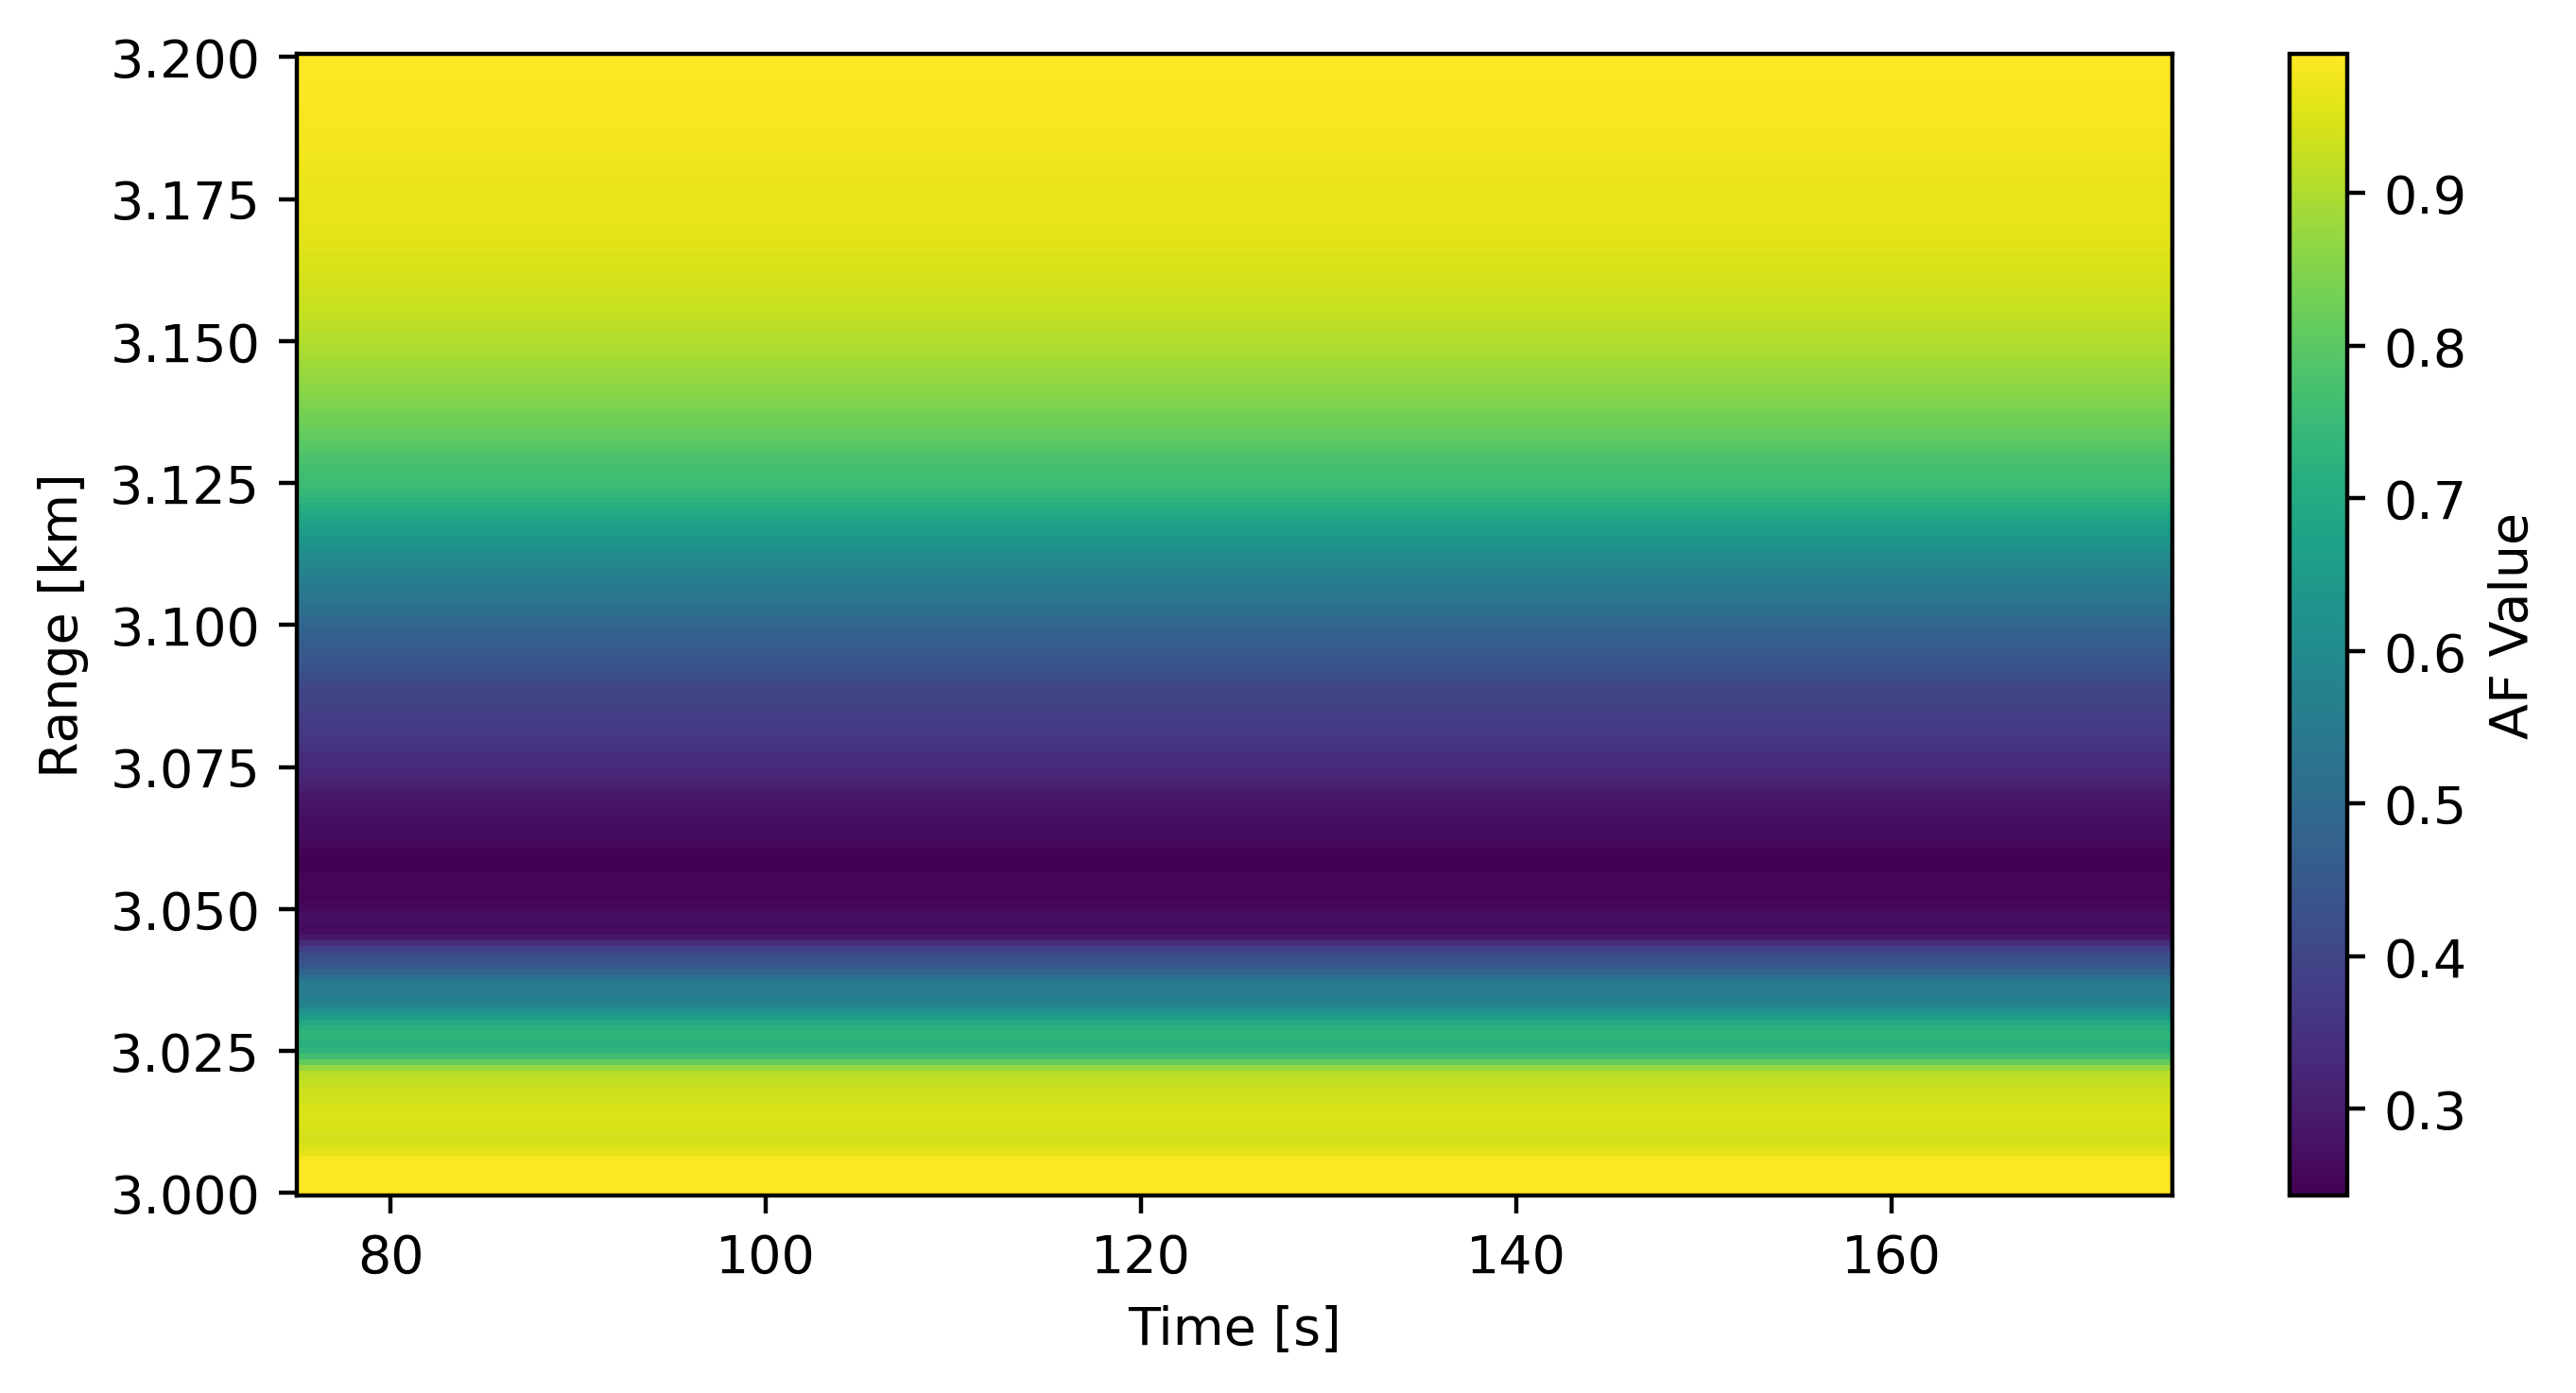

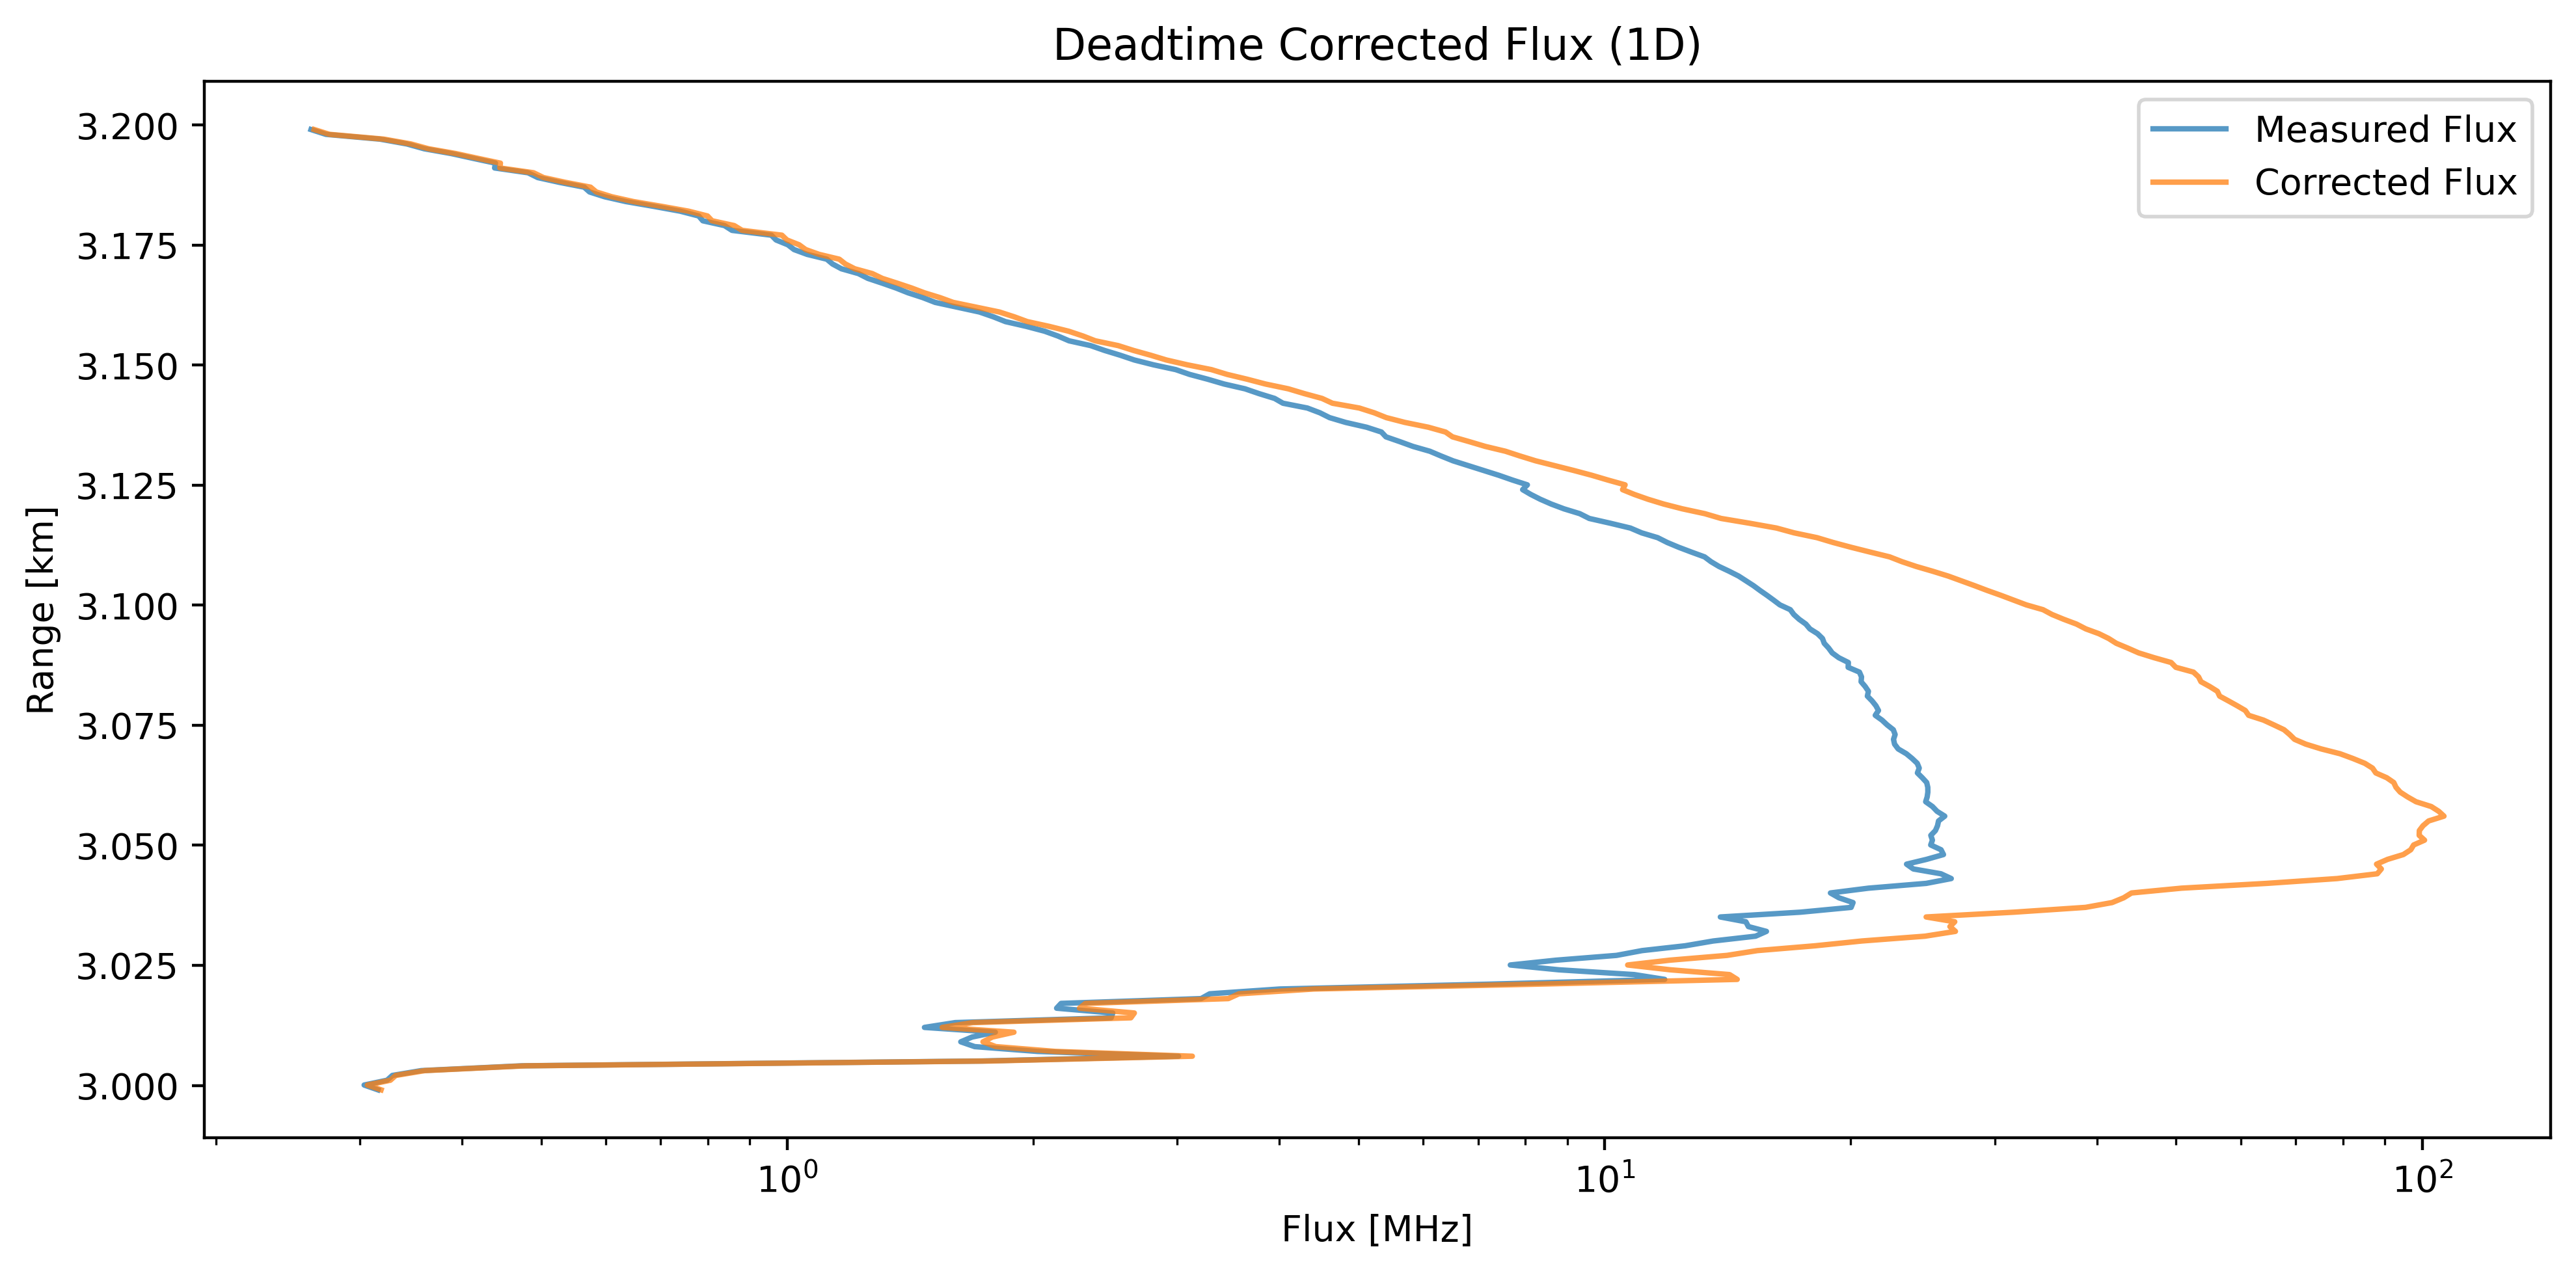

Locating and loading relevant netcdf data chunks...
Skipping chunk #0: 0.00–52.29s not in range 100.00–200.00s

Including chunk #1: 52.29–111.87s overlaps 100.00–200.00s
File loaded.

Including chunk #2: 111.87–171.03s overlaps 100.00–200.00s
File loaded.

Including chunk #3: 171.03–228.89s overlaps 100.00–200.00s
File loaded.

✅ Full time range 100.00–200.00s covered by loaded chunks.
Loaded 3 files
Using approximate resolutions for background estimate: 5.000e+01 m x 1.002e+01 s.
Actual range and time bin sizes: 5.000e+01 m x 1.002e+01 s

Starting to generate histogram for background estimate...
Finished generating histogram.
Time elapsed: 3.4 s
Raw flux background estimate: 5.259e+04 Hz
Mueller-corrected flux background estimate: 5.268e+04 Hz


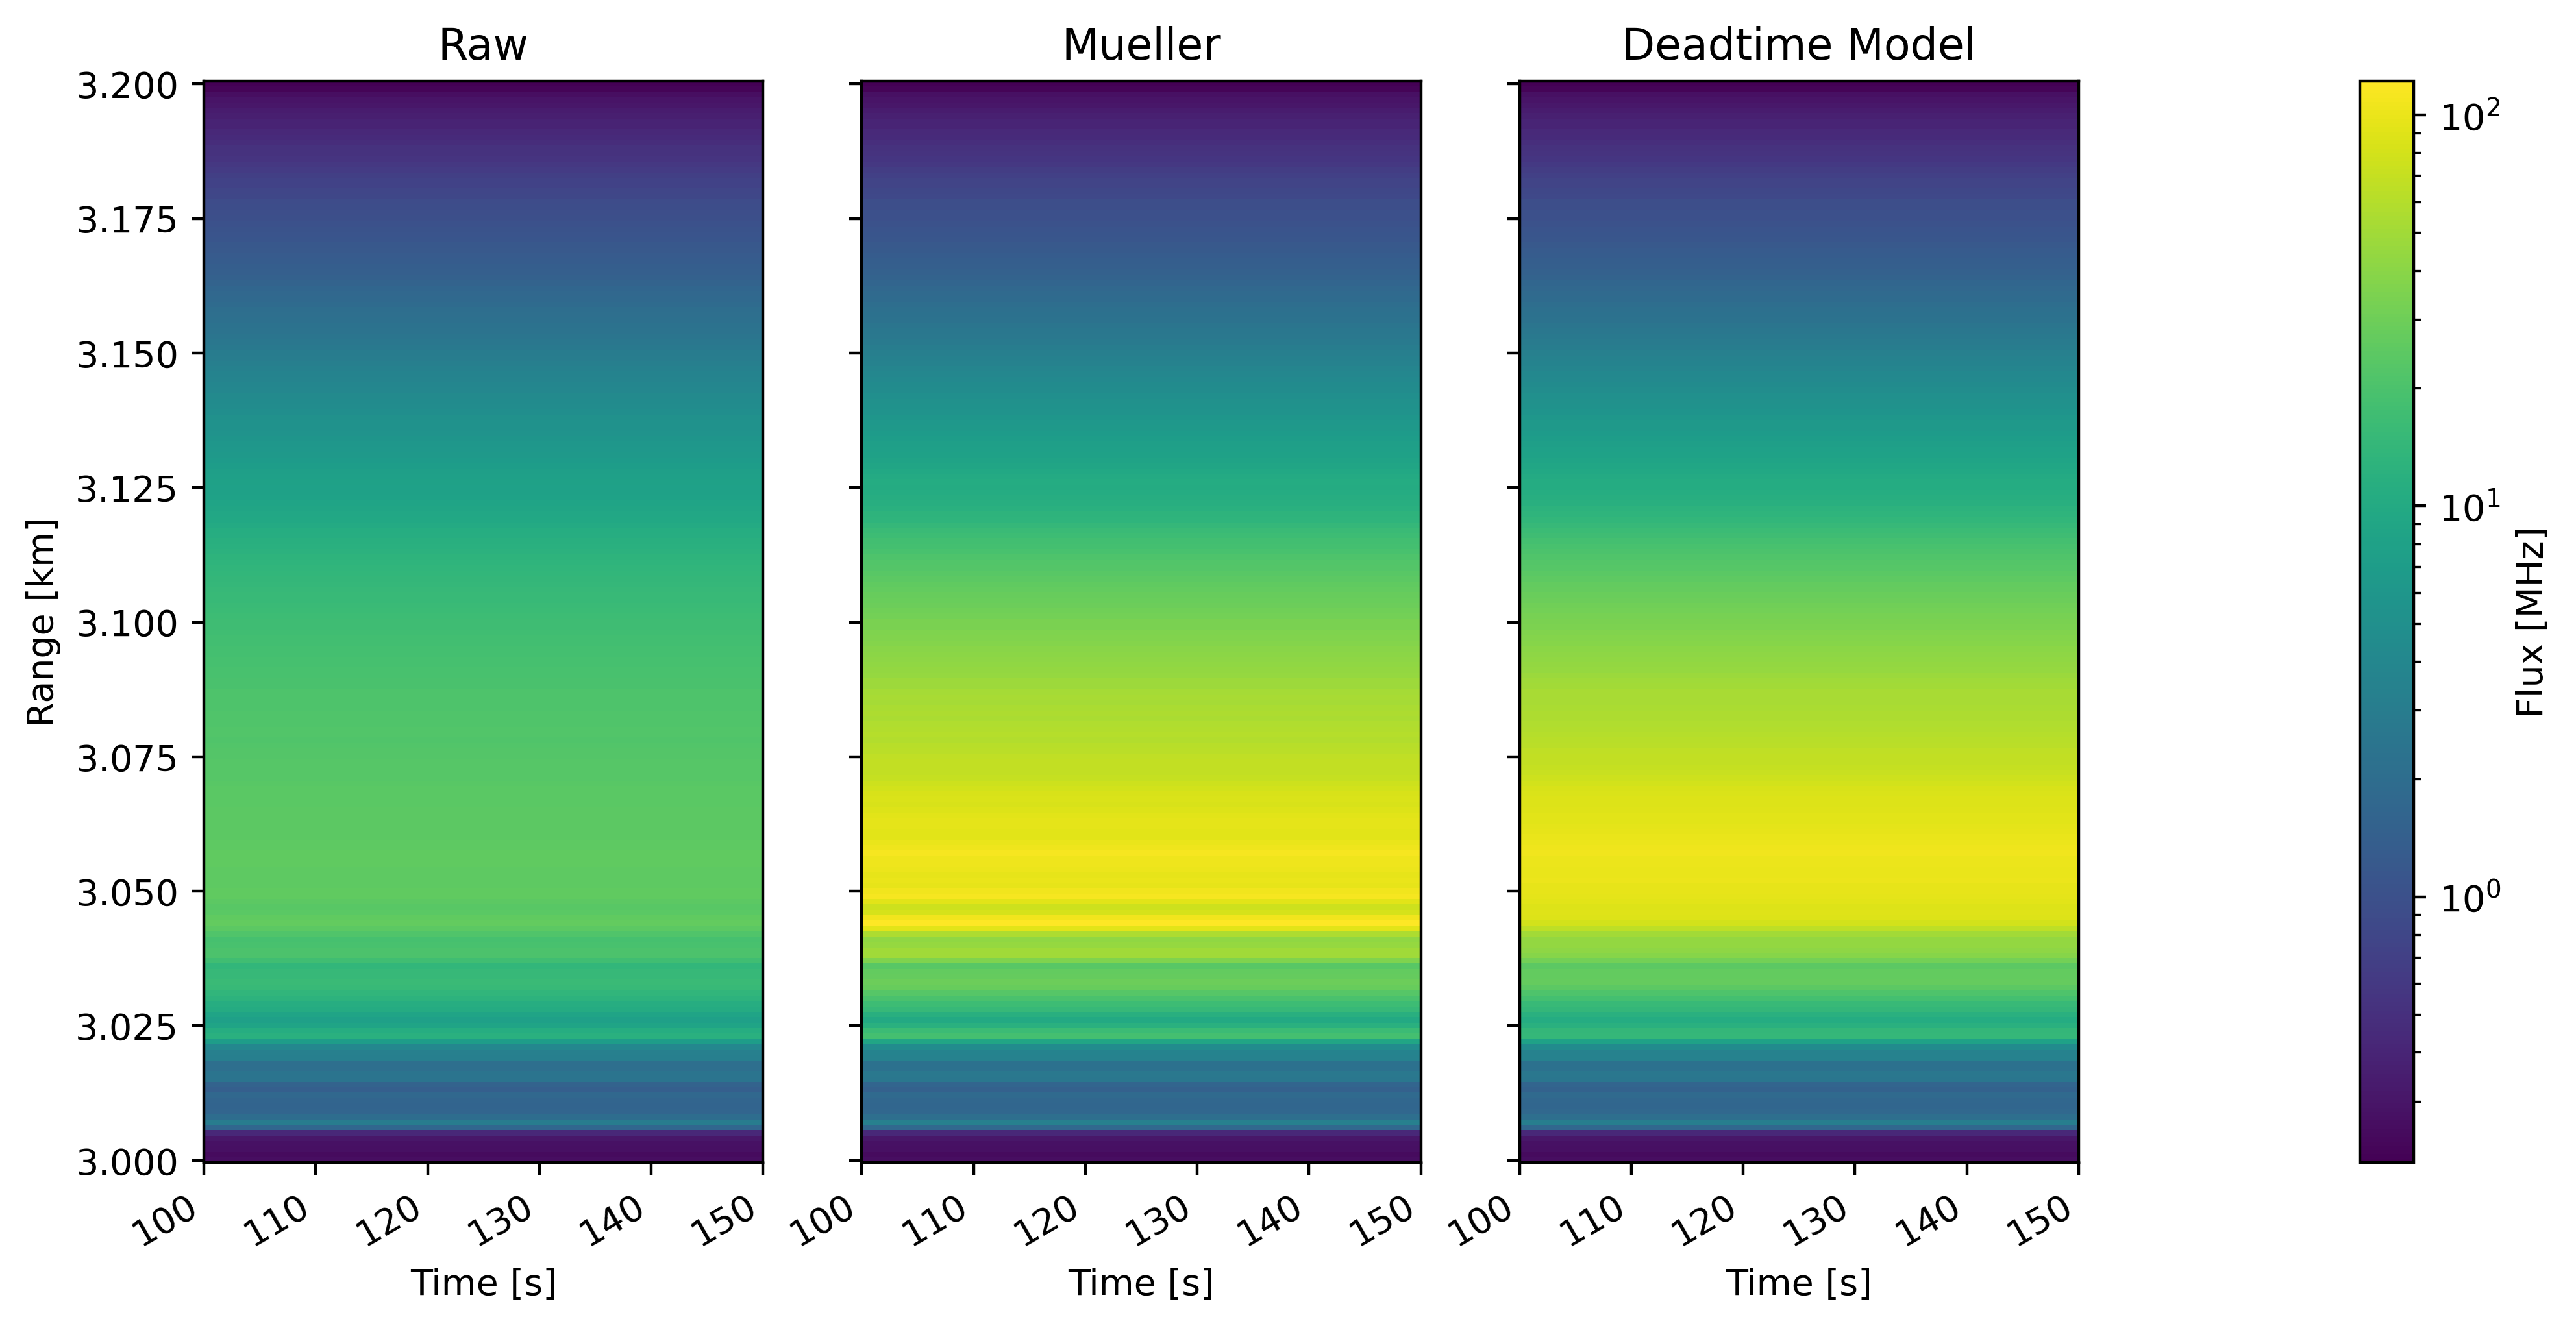

Using Linux data directory: /data/grki4829/CoBaLT
Measurement time: 2025-09-13 22:16:13

Preprocessed data file(s) found. No need to create new one(s)...
Locating and loading relevant netcdf data chunks...

Including chunk #0: 0.00–275.94s overlaps 100.00–150.10s
File loaded.

✅ Full time range 100.00–150.10s covered by loaded chunks.
Loaded 1 files
Using resolutions: 1.000e+00 m x 5.000e+01 s.
Actual range and time bin sizes: 1.000e+00 m x 5.000e+01 s

Starting to generate histogram...
Finished generating histogram.
Time elapsed: 0.0 s
Elapsed time: 0.00018453598022460938 s


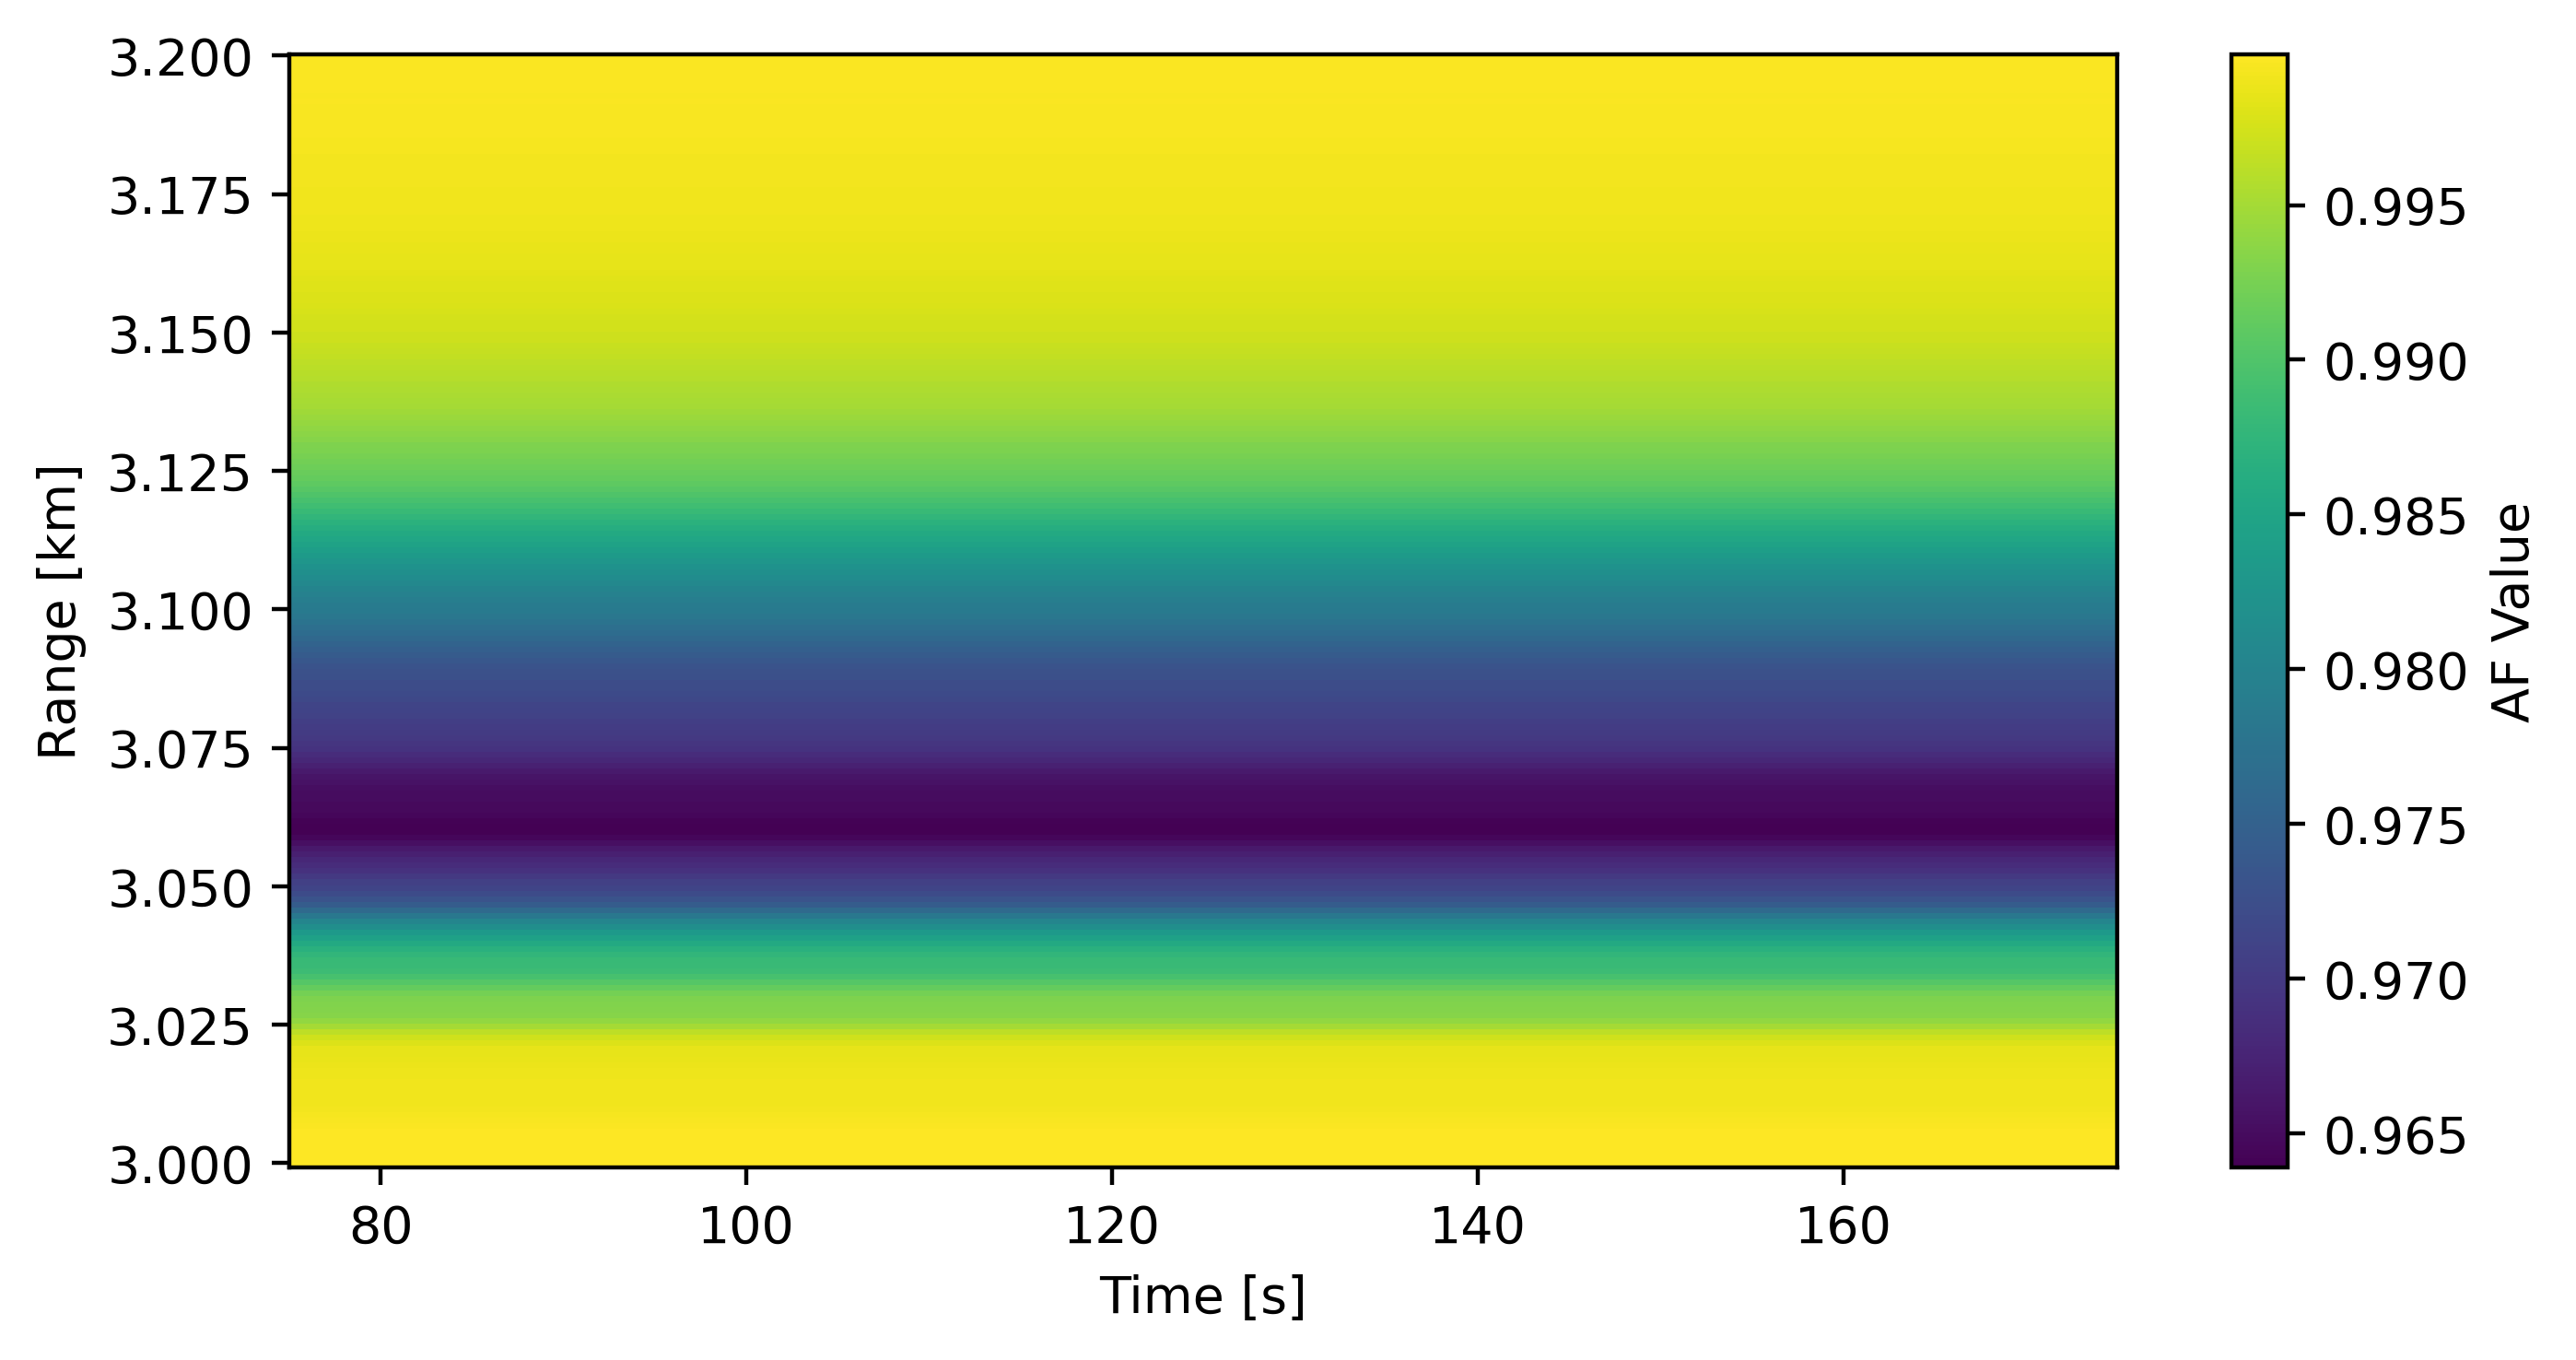

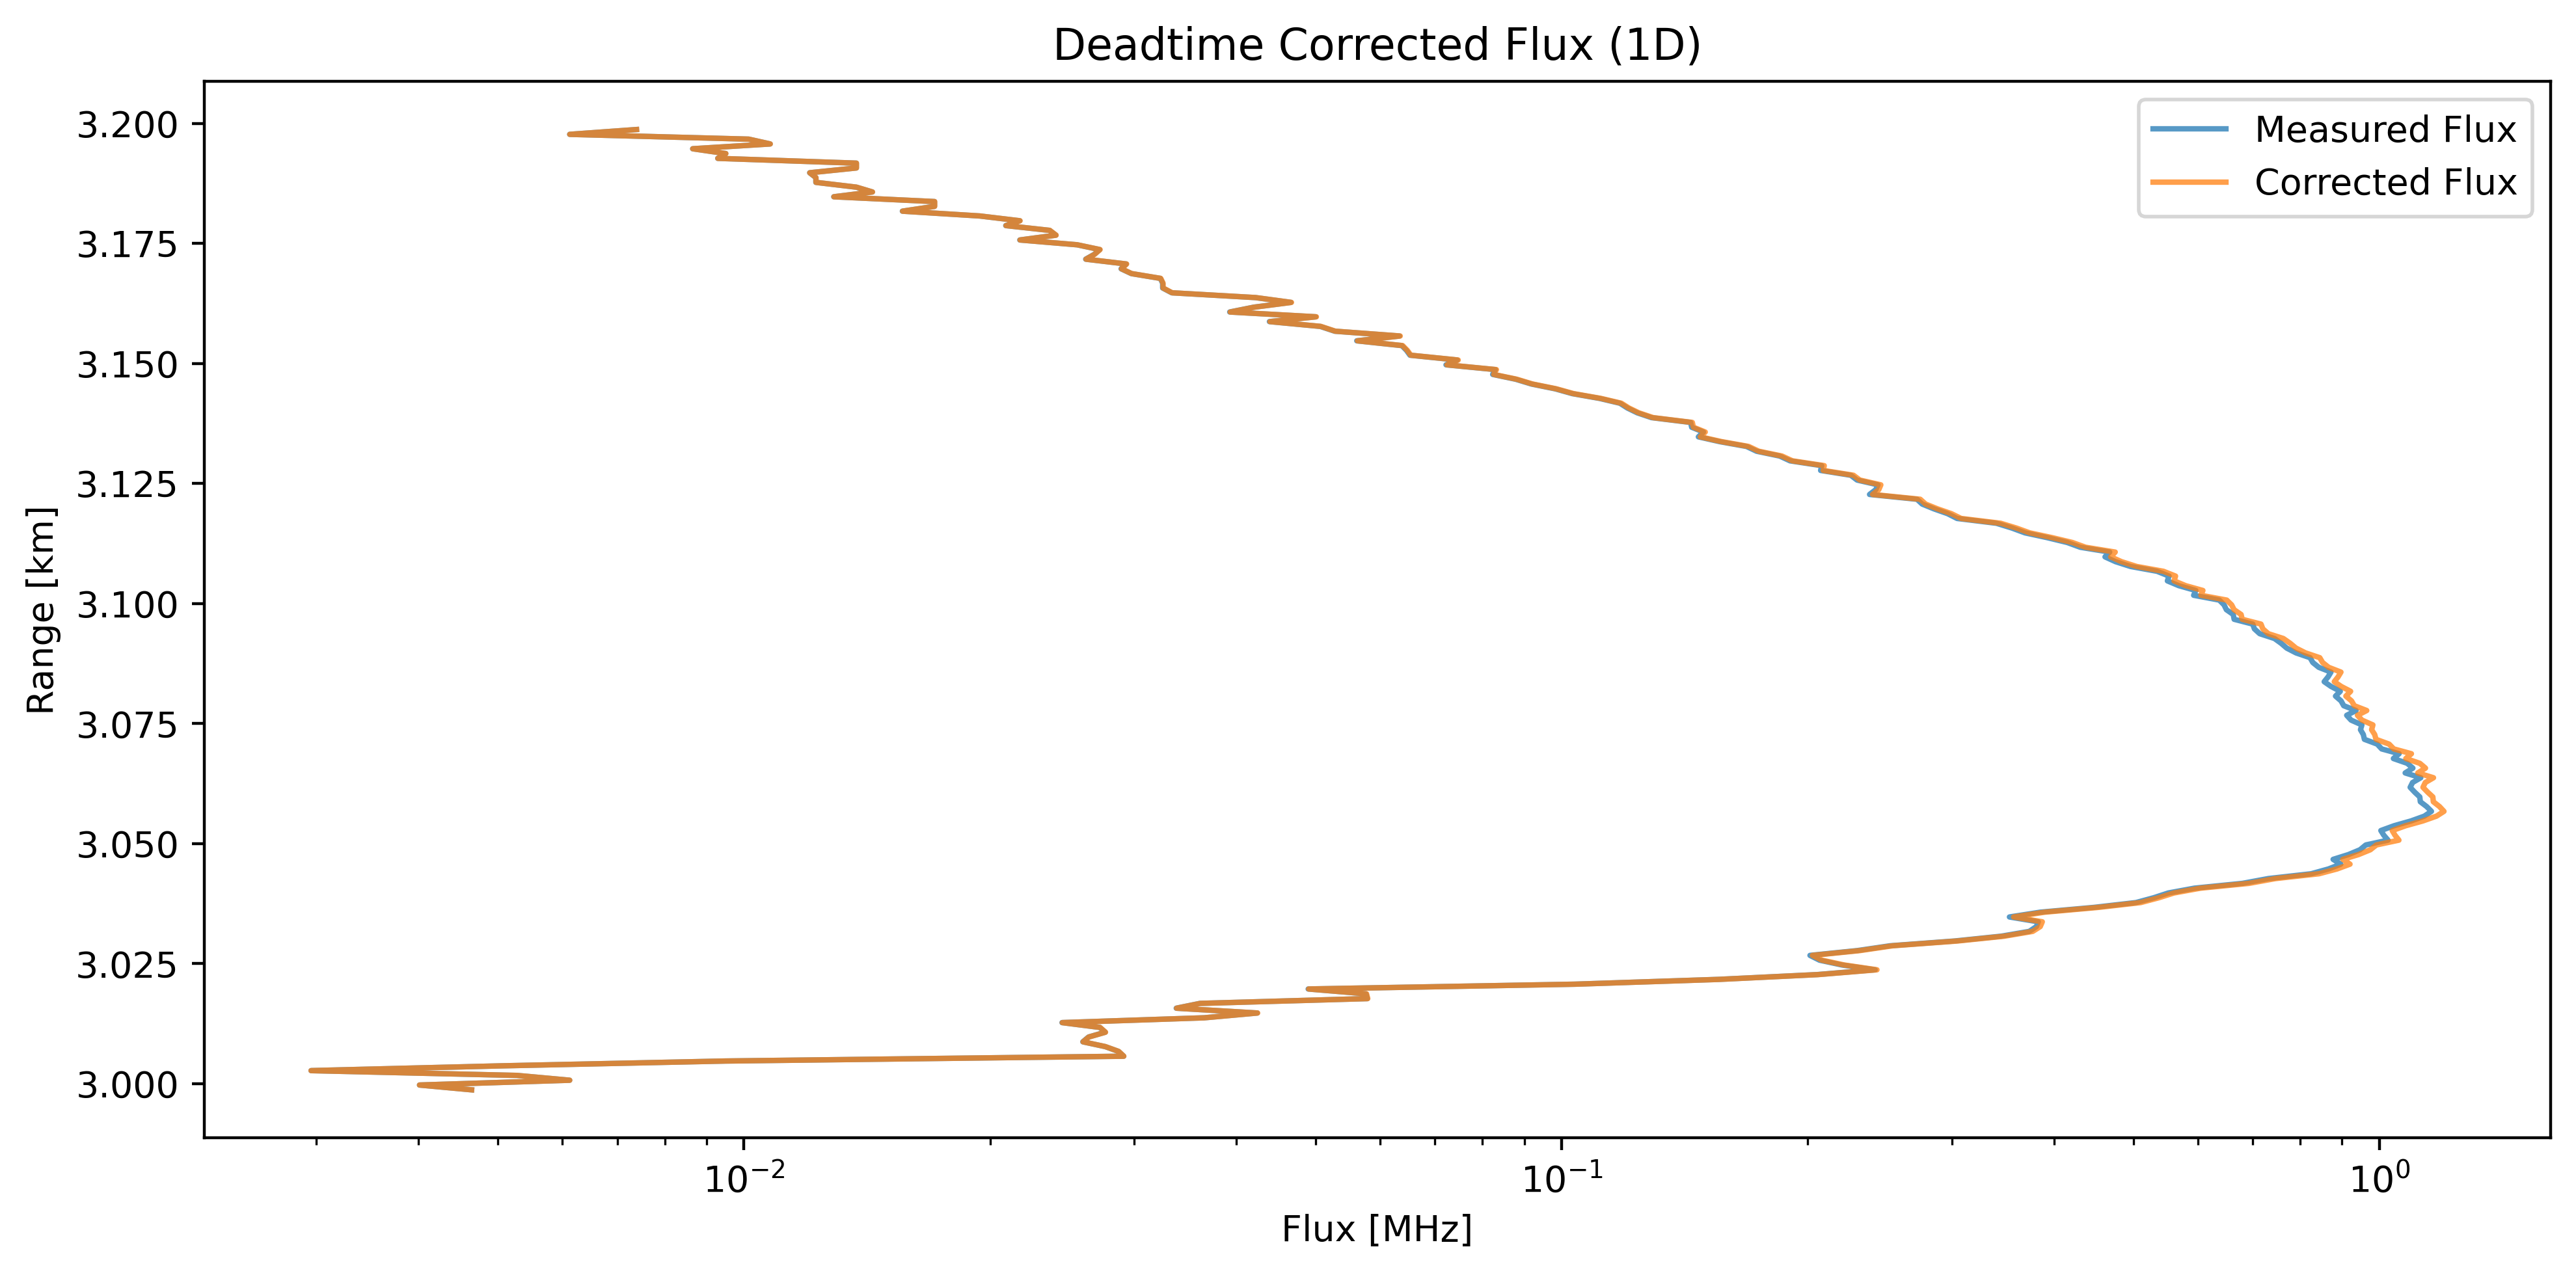

Locating and loading relevant netcdf data chunks...

Including chunk #0: 0.00–275.94s overlaps 100.00–200.00s
File loaded.

✅ Full time range 100.00–200.00s covered by loaded chunks.
Loaded 1 files
Using approximate resolutions for background estimate: 5.000e+01 m x 1.002e+01 s.
Actual range and time bin sizes: 5.000e+01 m x 1.002e+01 s

Starting to generate histogram for background estimate...
Finished generating histogram.
Time elapsed: 0.0 s
Raw flux background estimate: 1.057e+03 Hz
Mueller-corrected flux background estimate: 1.057e+03 Hz


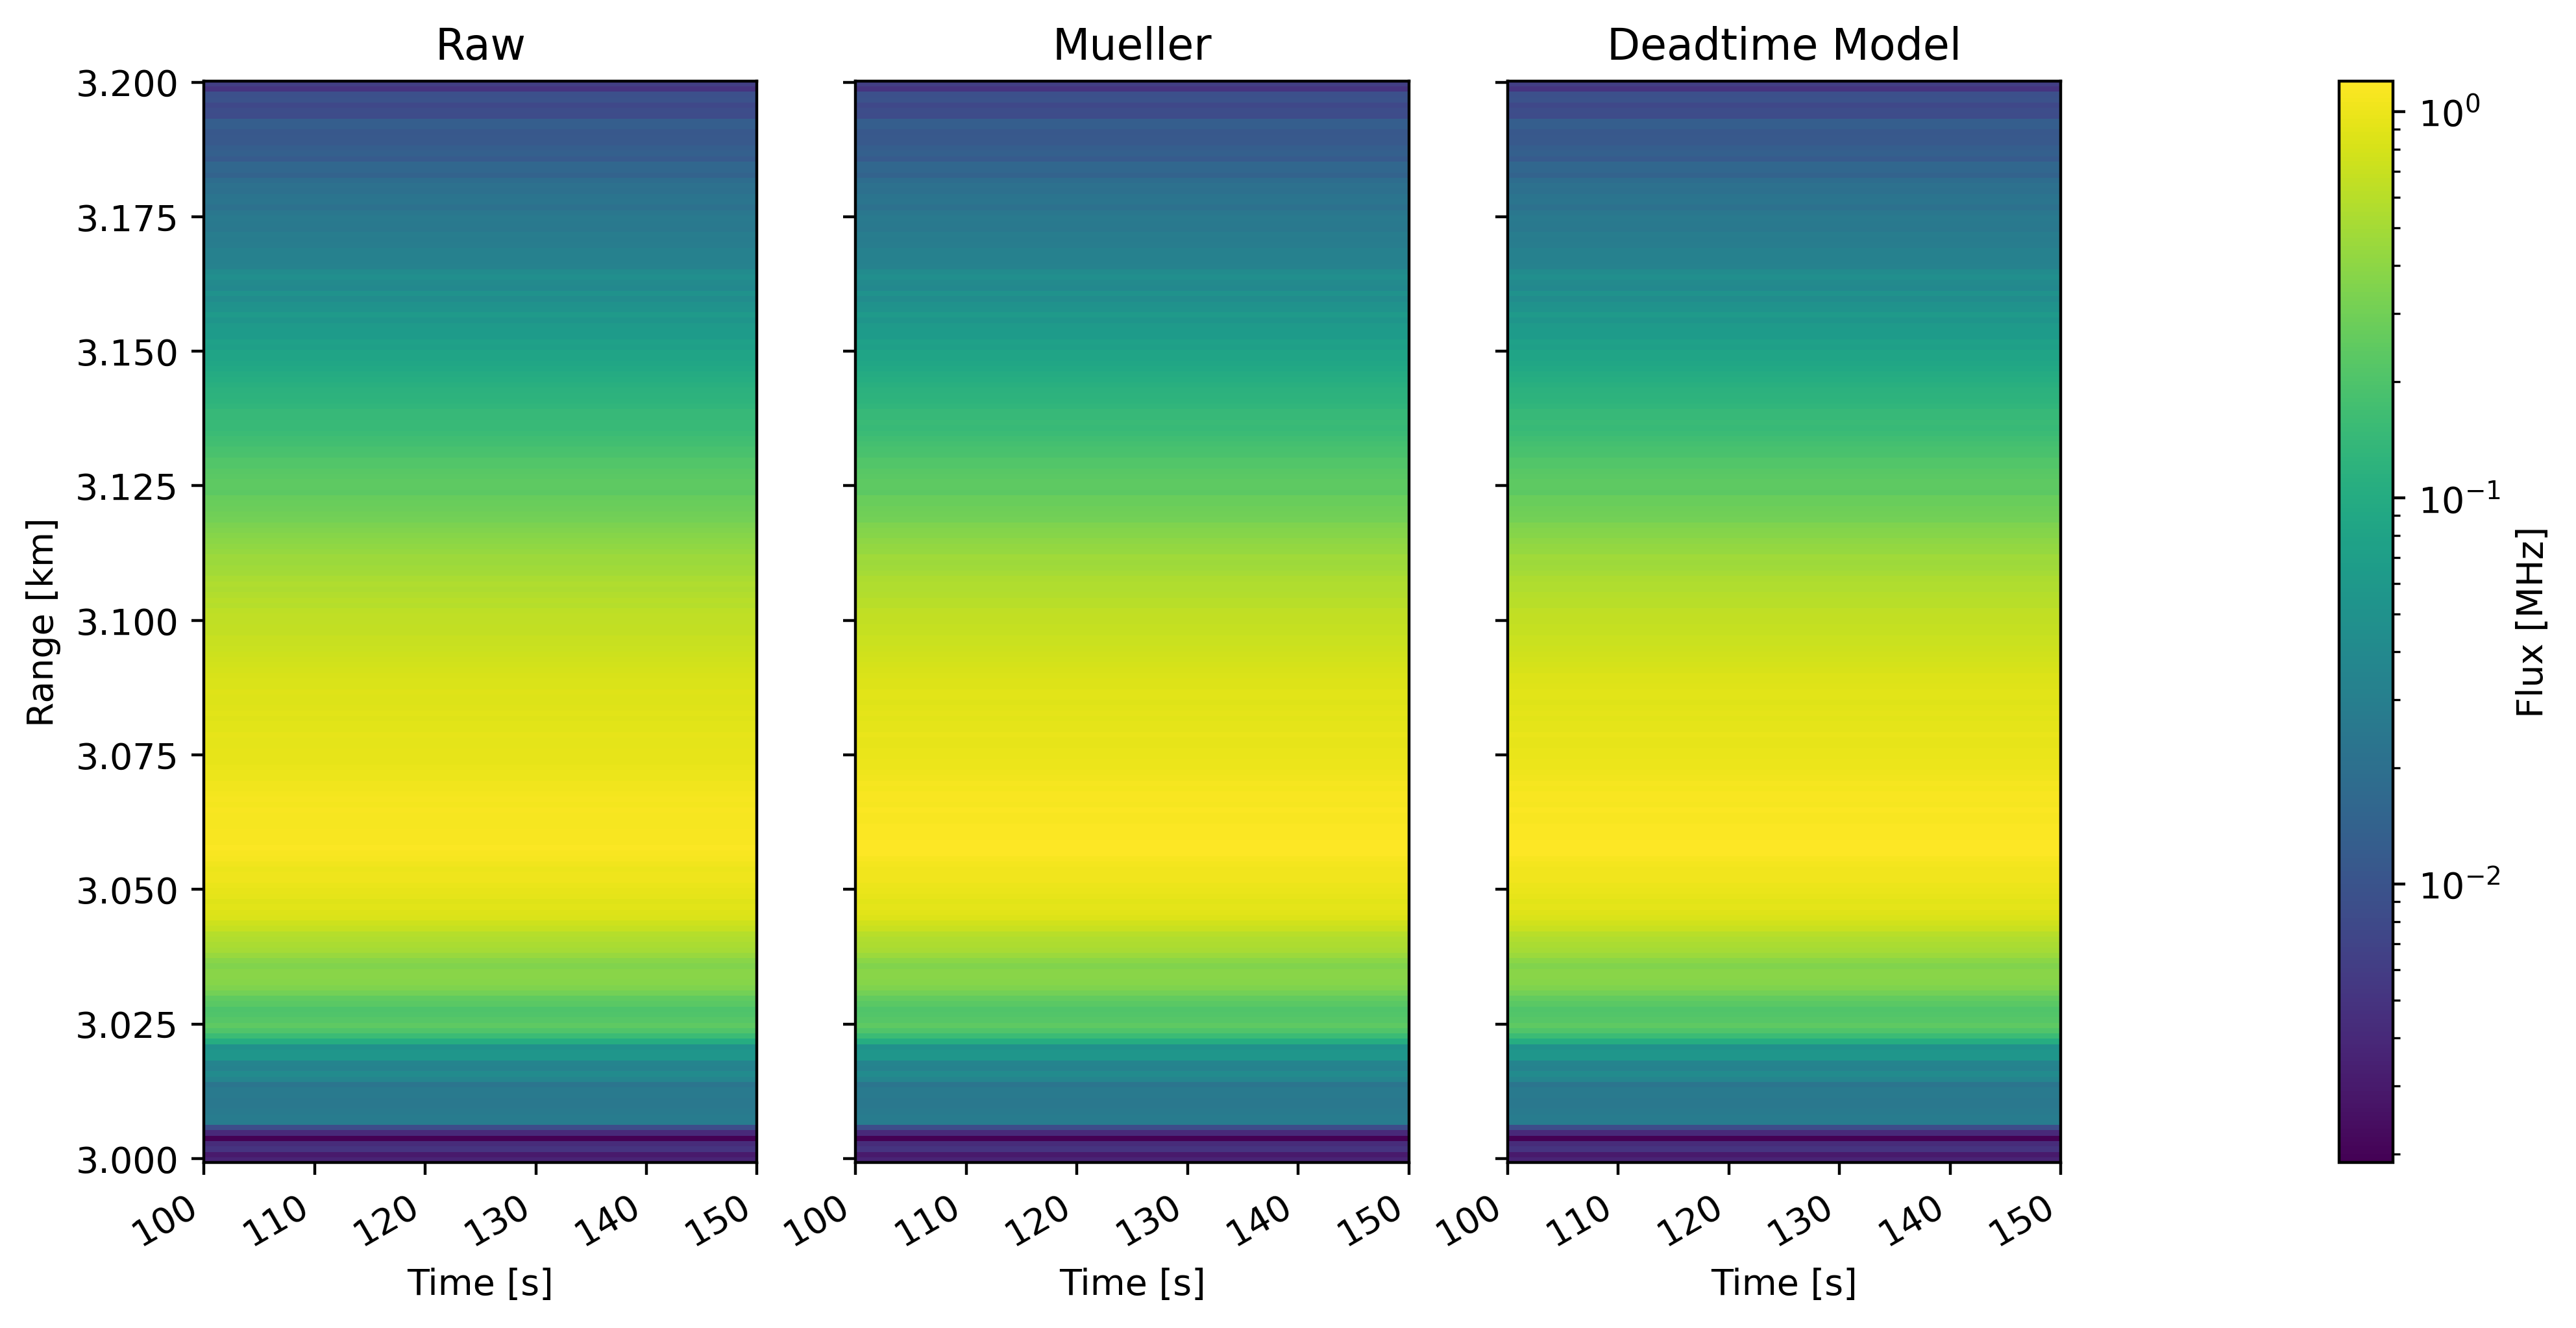

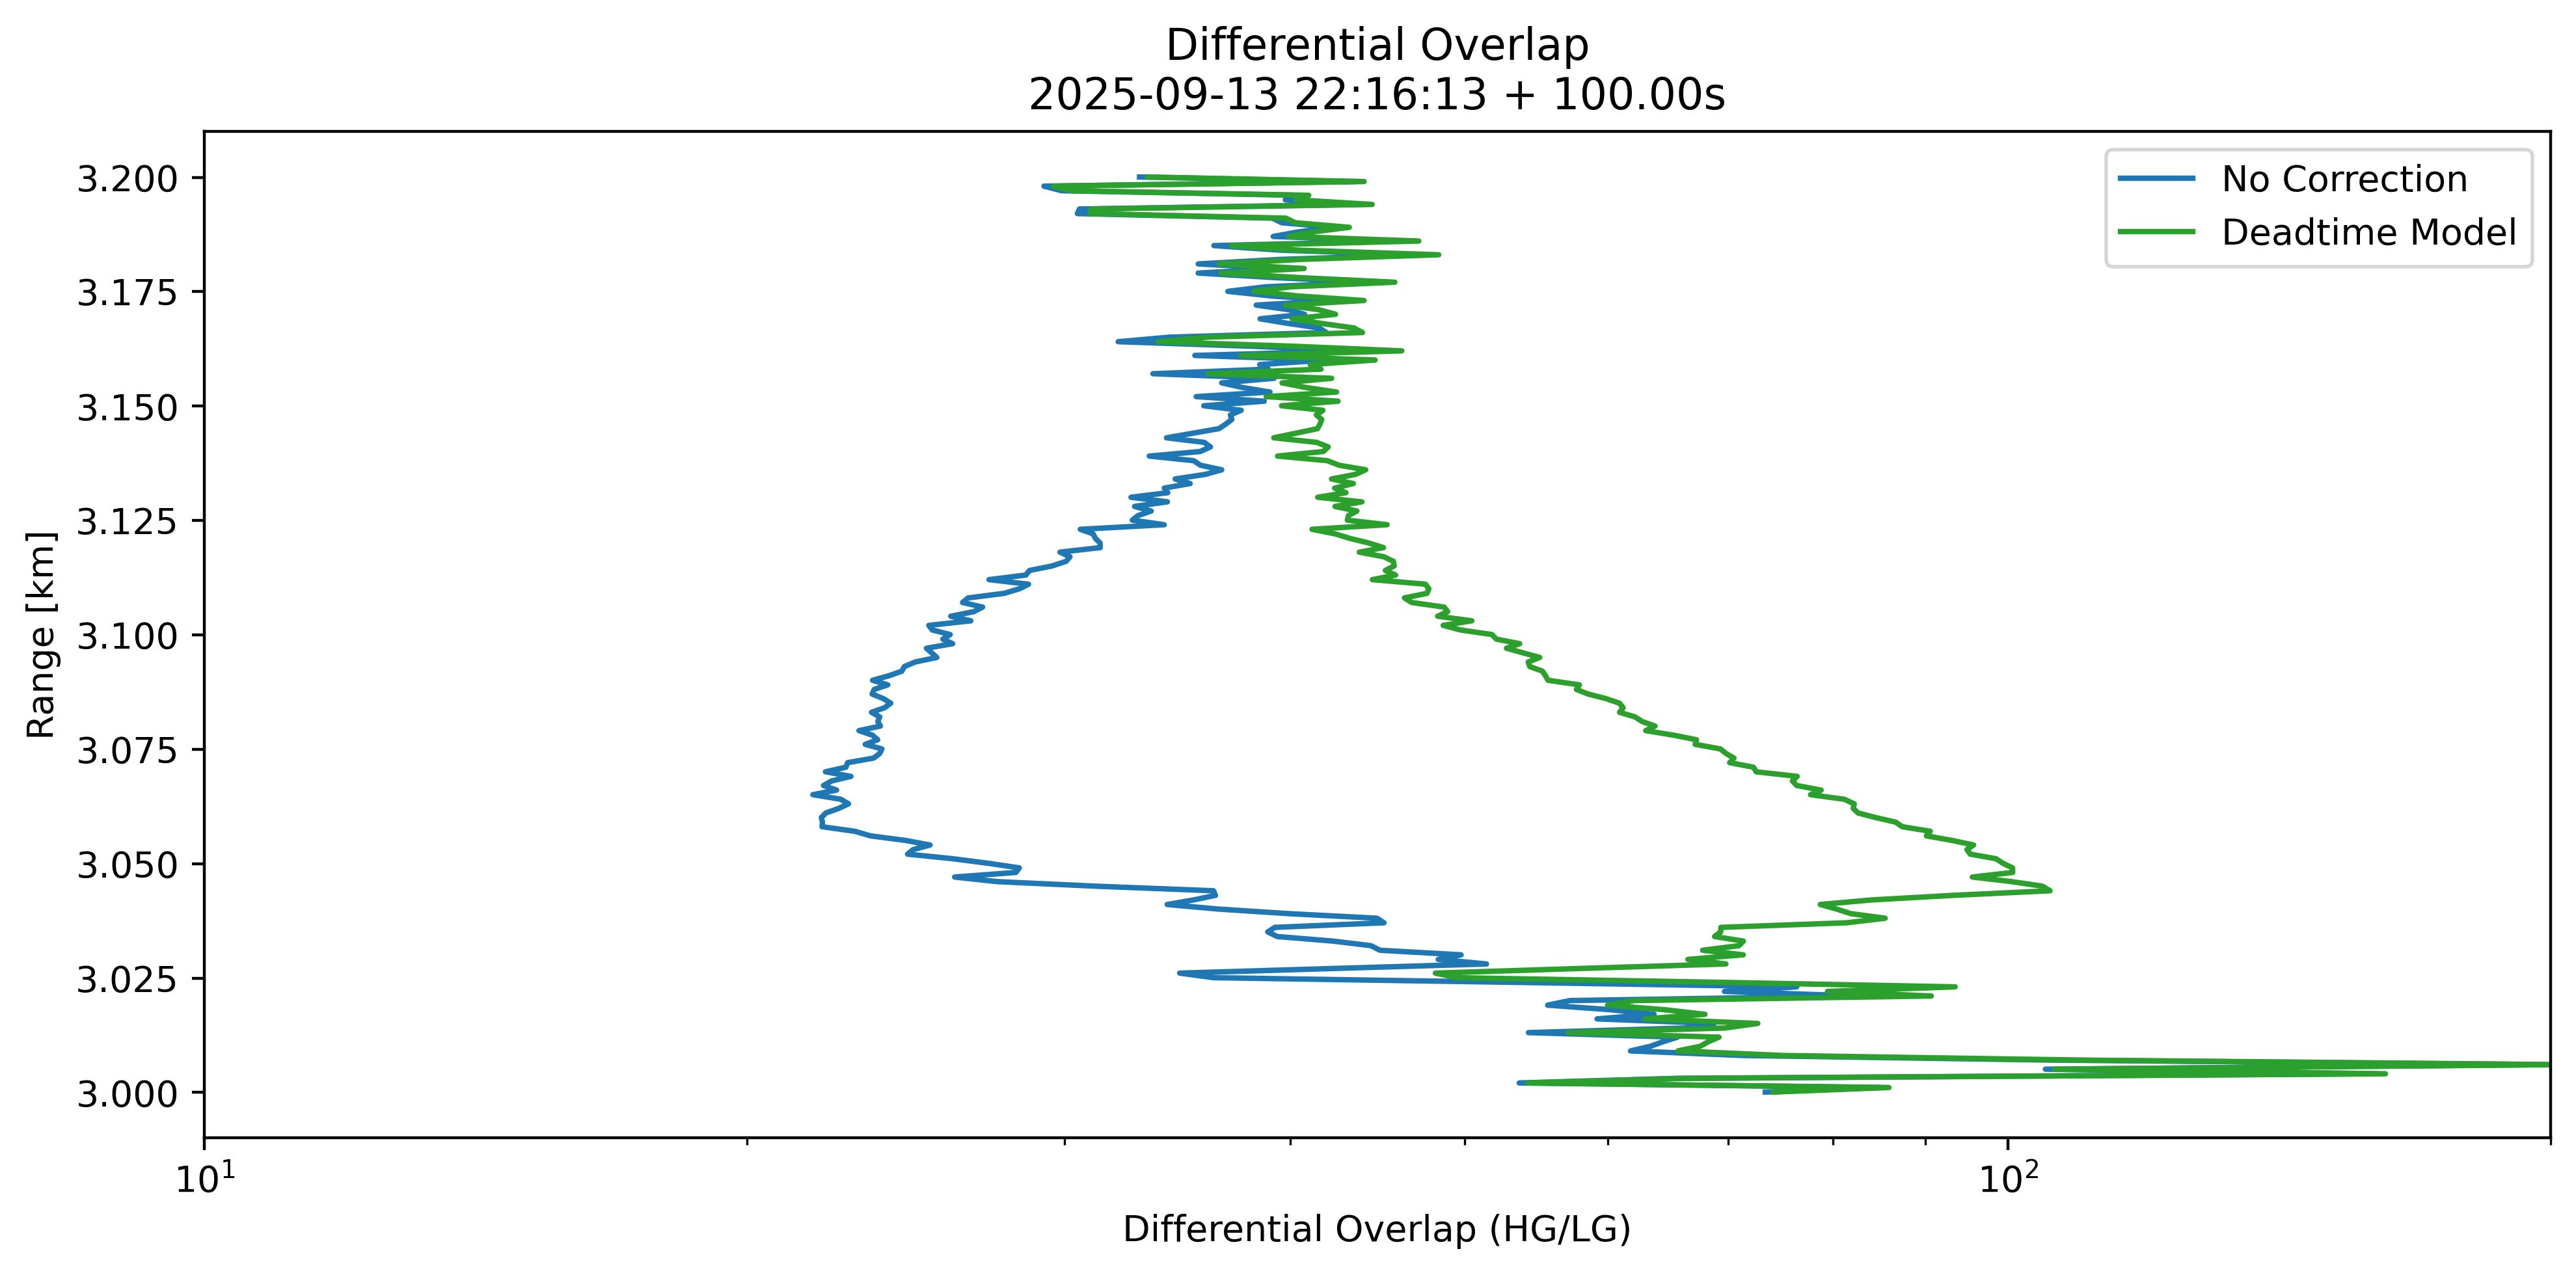

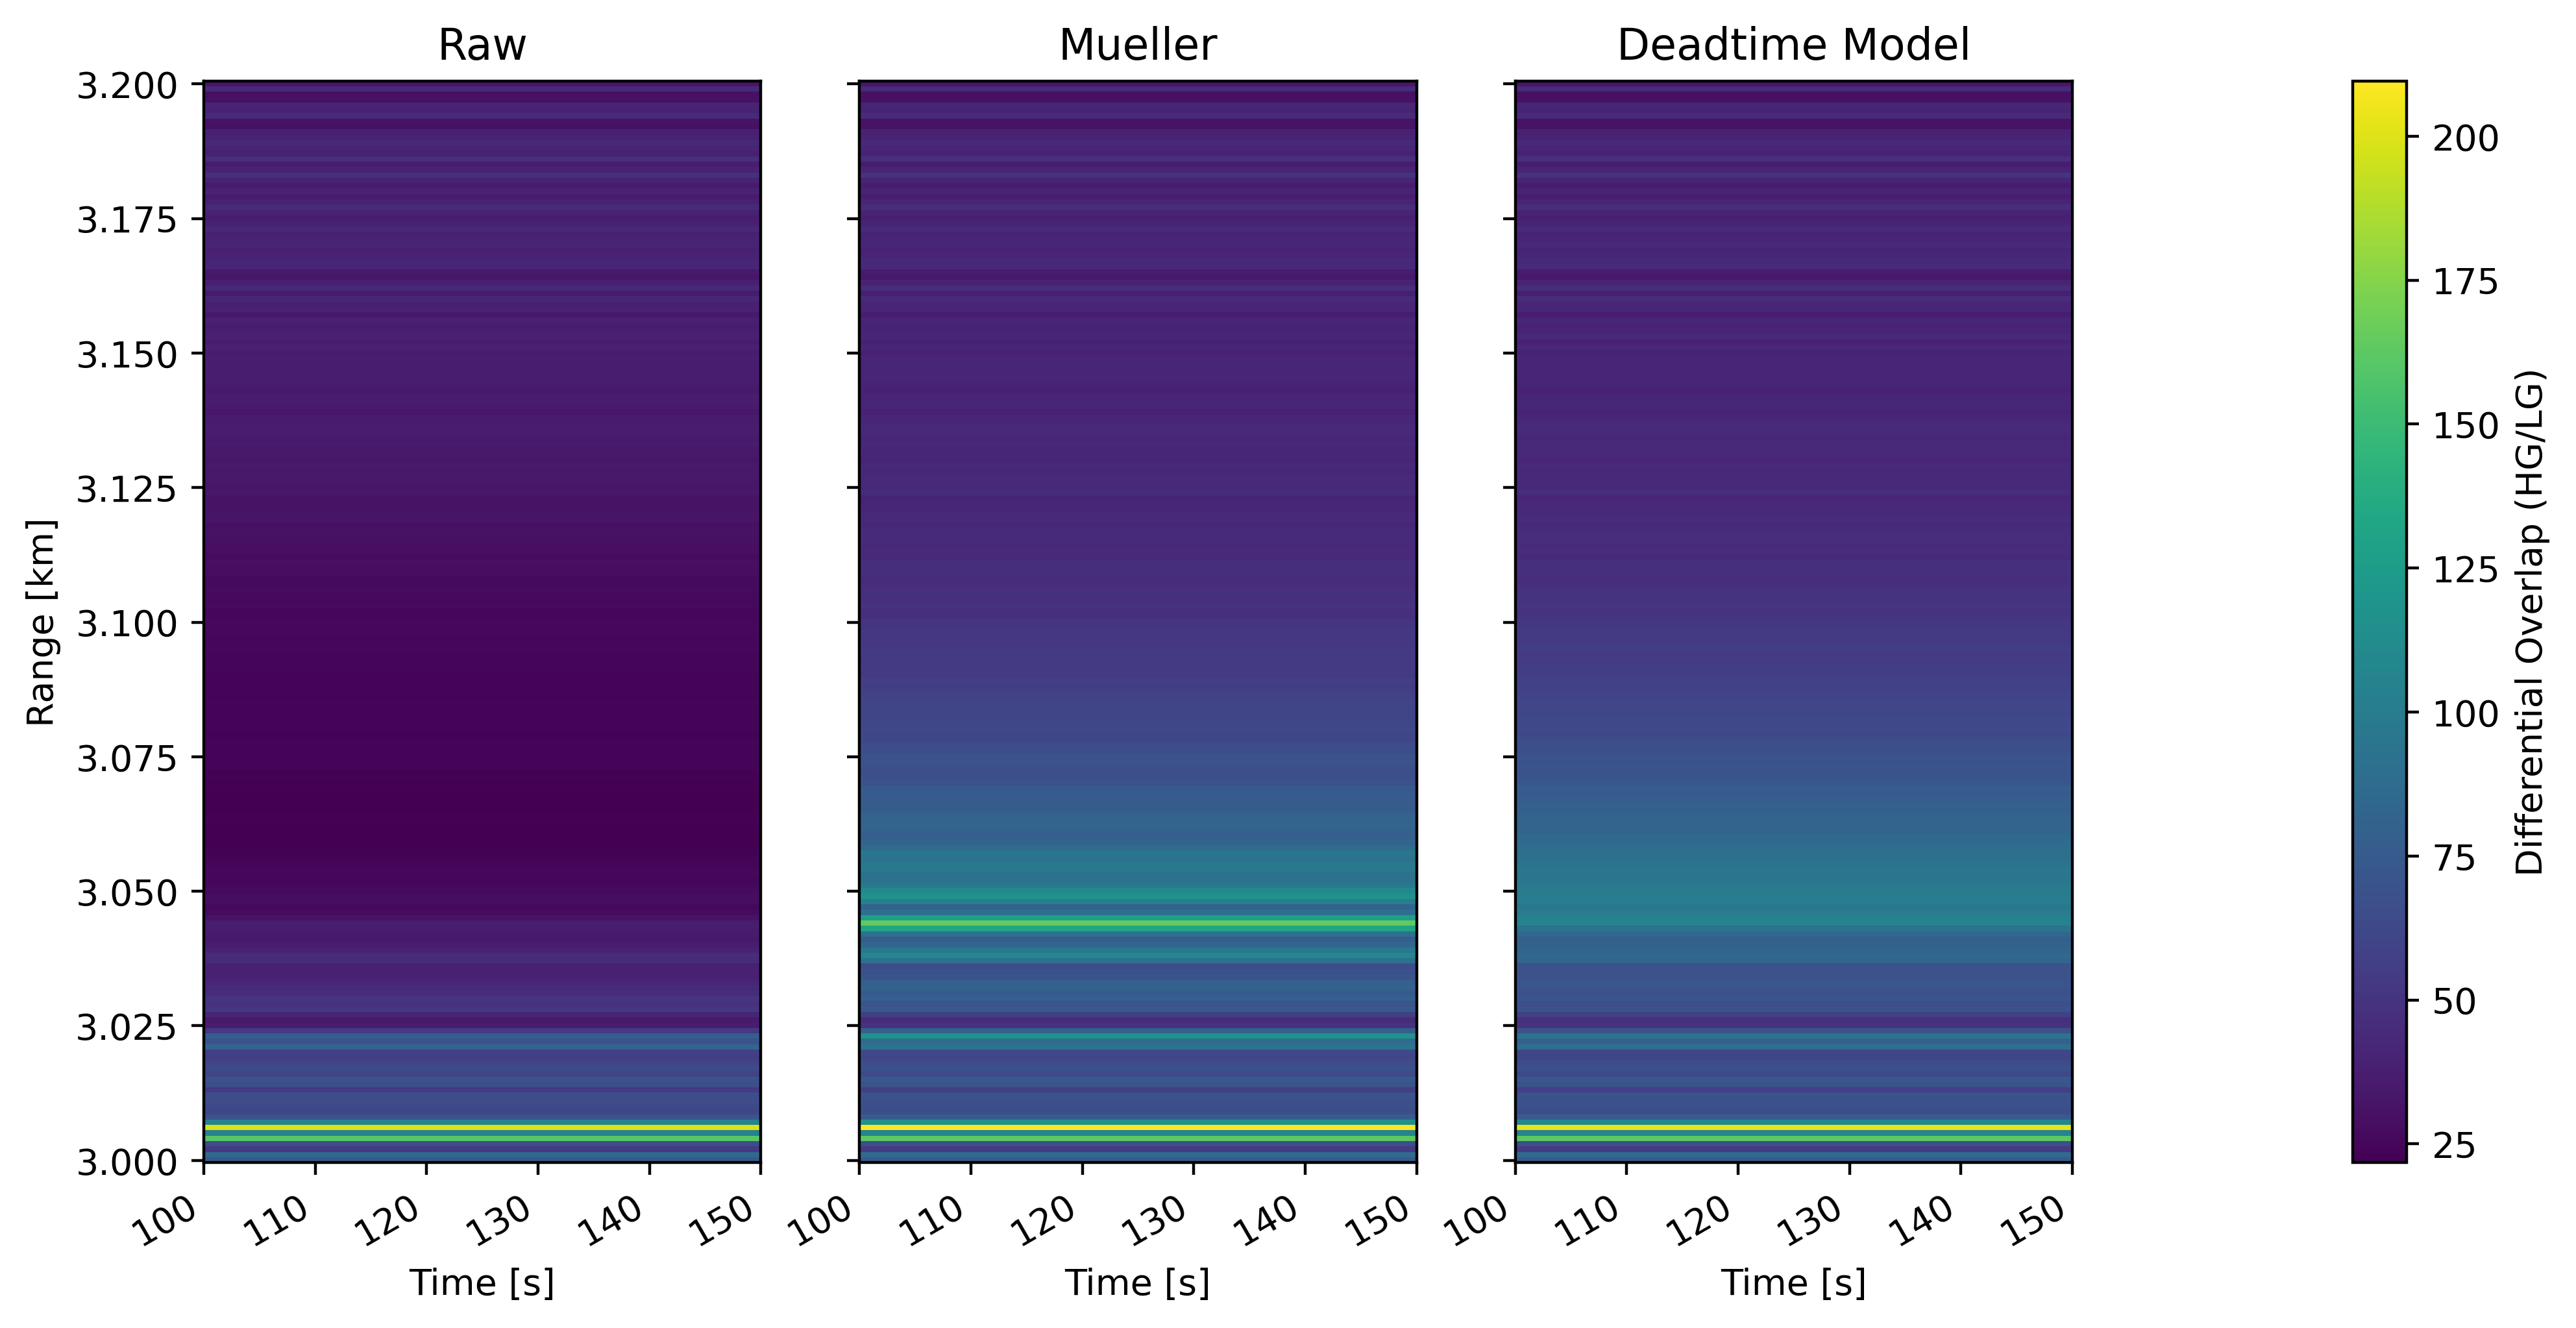

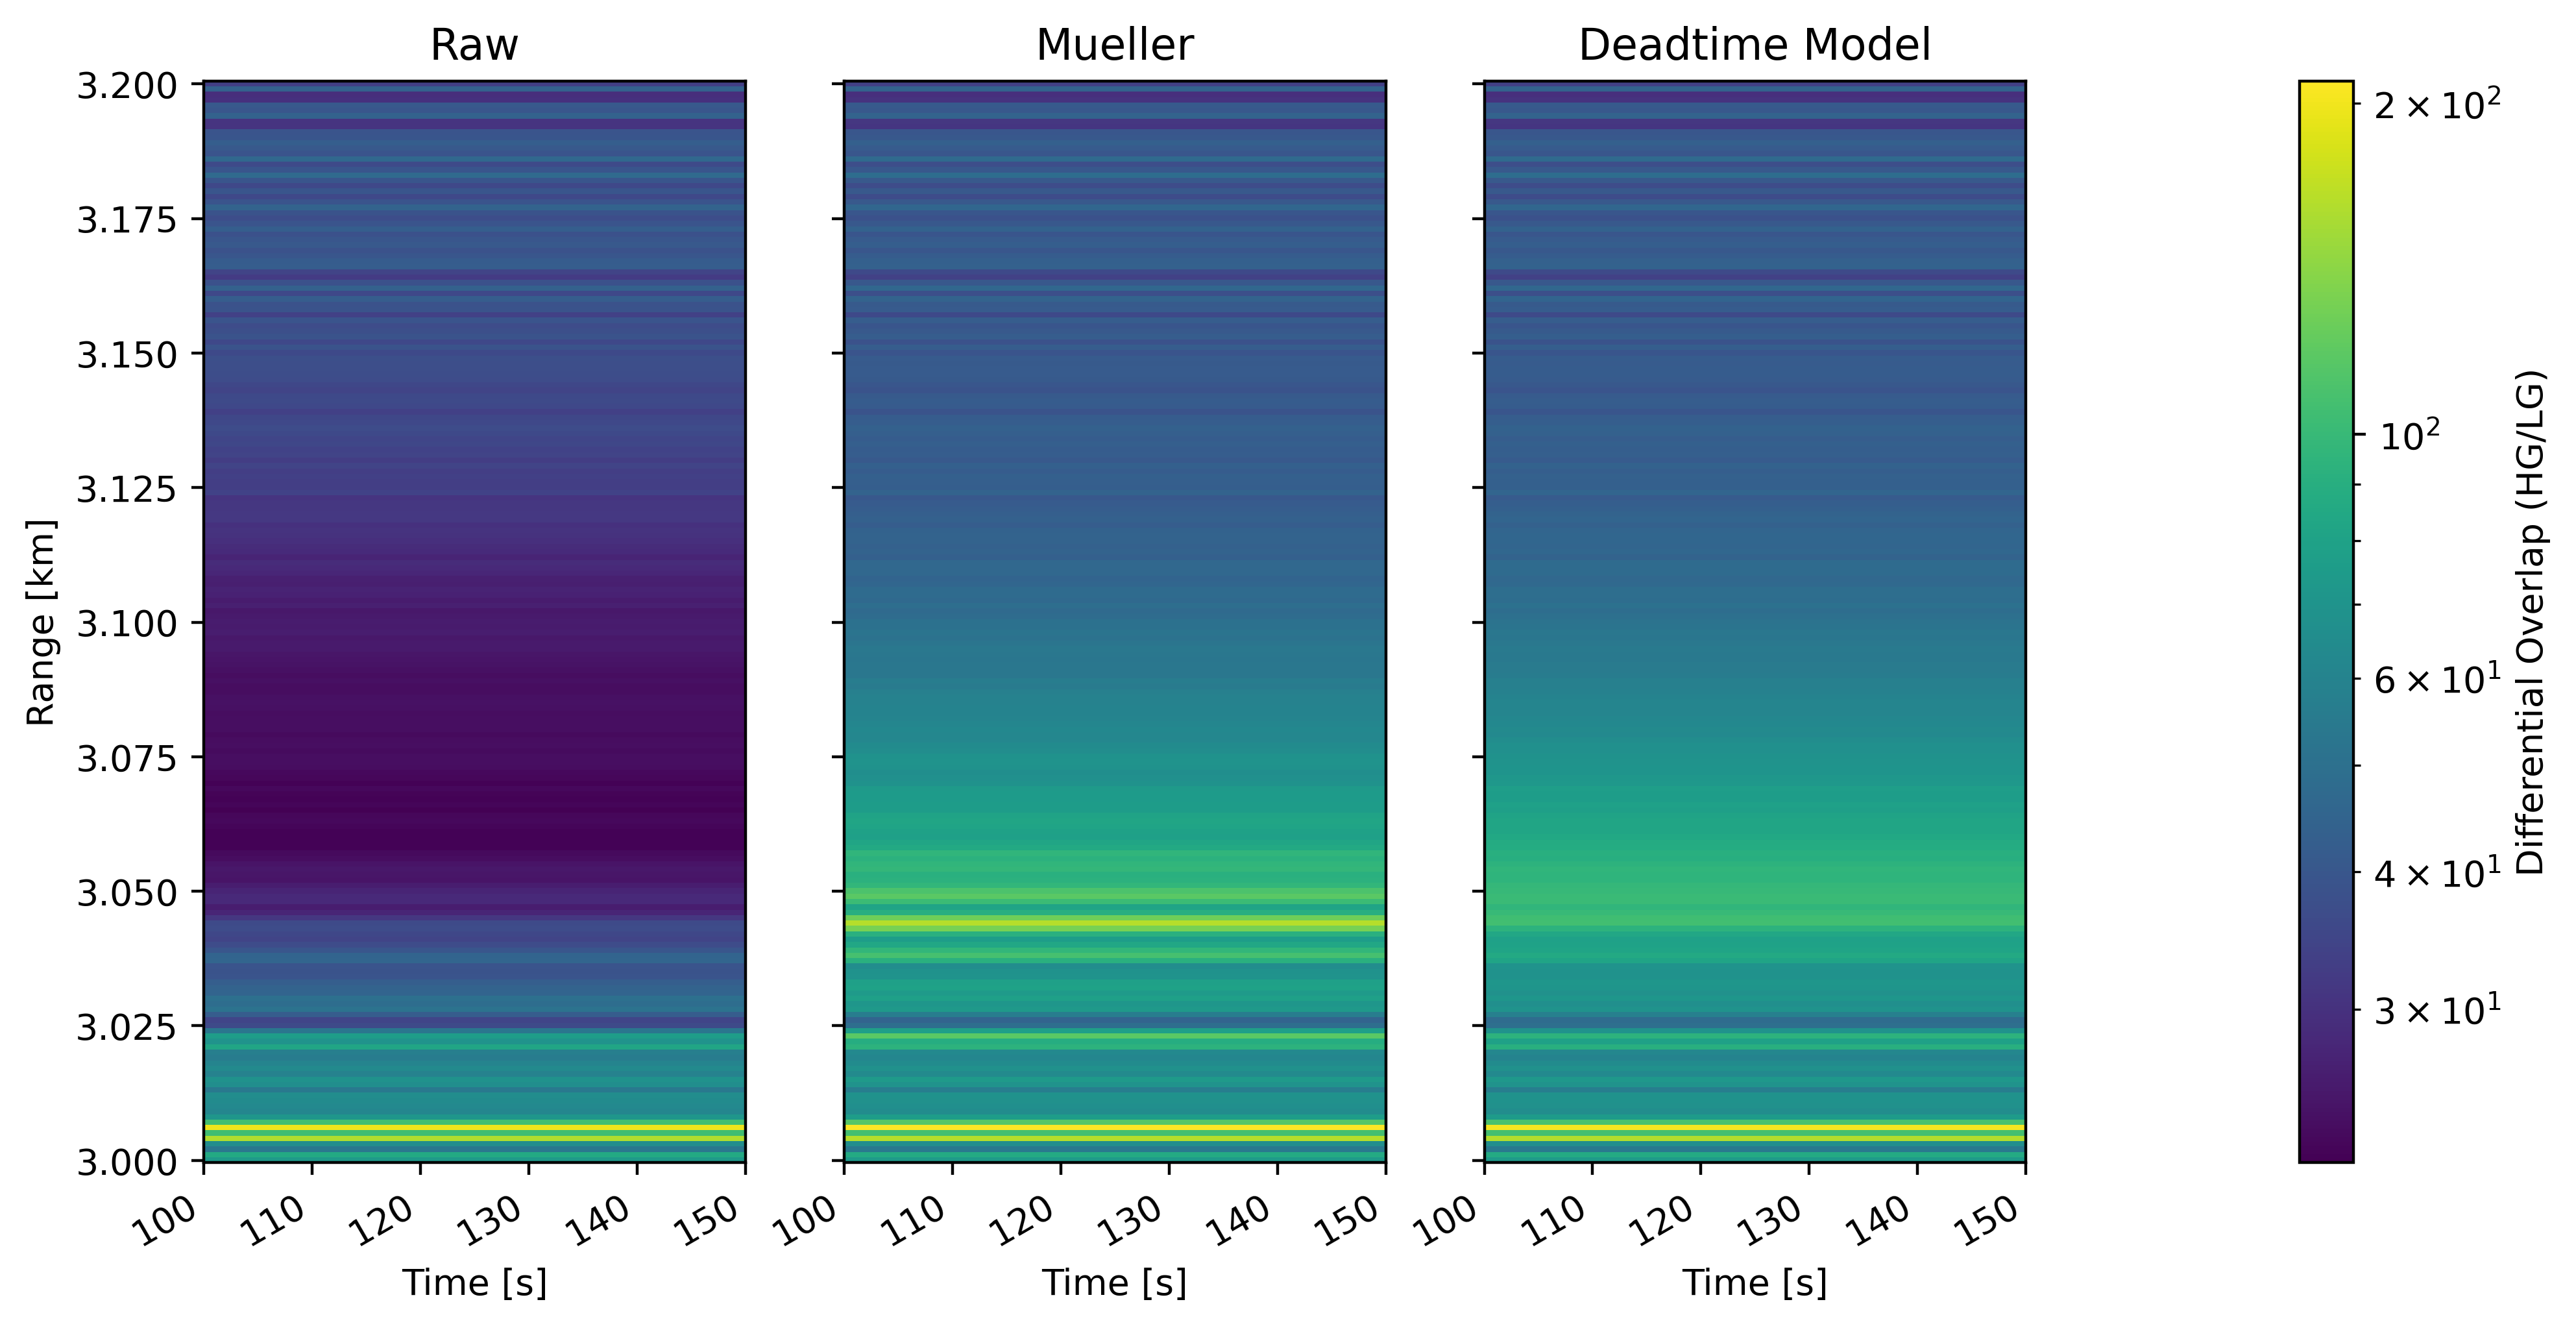

In [ ]:
# Run the processing pipeline
# Note: this may open plots (depending on the config). Run this cell when you're ready.
dp.run()
